In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

# Analisis de datos con python

La base de datos tiene registros desde el 2017 hasta el 2020

**El objetivo de este analisis es responder estas preguntas mediante  datos historicos de registros de accidentes de transito en colombia**

¿en que territorios de colombia se ve mas accidentalidad?

¿en que fecha del año hay mas accidentes de transito?

¿cuales son los dias de la semana con mas accidentes?

¿el estado de la carretera influye?

¿el clima influye en los accidentes de transito?

¿cuales son los tipos de accidentes que mas cobran vidas?



In [14]:
dataset = pd.read_csv('base_de_datos_accidentalidad.csv')

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14970 entries, 0 to 14969
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14970 non-null  int64  
 1   territorial      14970 non-null  object 
 2   fecha_acc        14970 non-null  object 
 3   dia_semana_acc   14970 non-null  object 
 4   condic_meteor    14970 non-null  object 
 5   estado_super     14970 non-null  object 
 6   terreno          14970 non-null  object 
 7   geometria_acc    14970 non-null  object 
 8   tipo_cierre      14970 non-null  object 
 9   n_heridos        14970 non-null  int64  
 10  n_muertos        14970 non-null  int64  
 11  clase_accidente  14970 non-null  object 
 12  hora_acc         14970 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.5+ MB


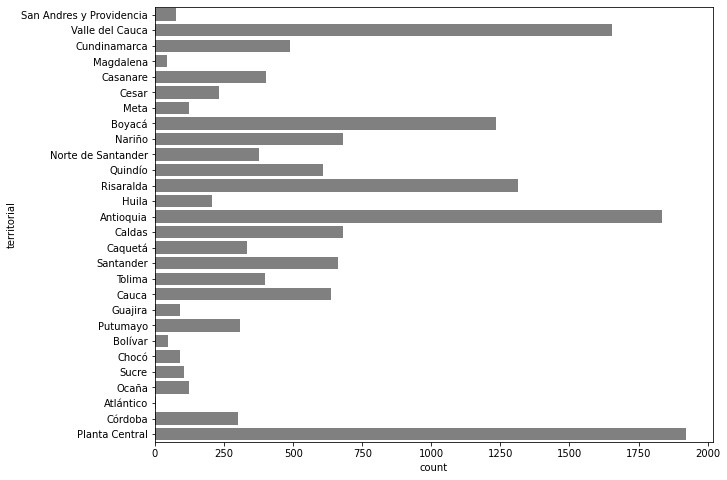

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='territorial', data=dataset, color="gray")

**Valle del cauca y antioquia son los departamentos de mas accidentalidad, pero sera que tambien son los que mas reportan muertes?**

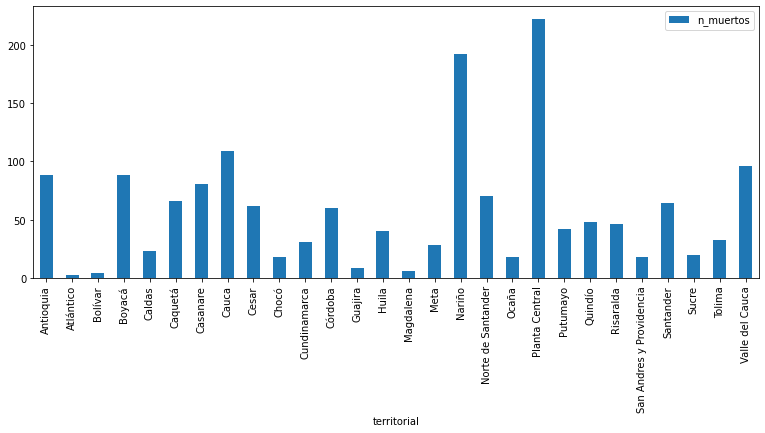

In [17]:
dataset.groupby('territorial')['n_muertos'].sum().plot(kind='bar',legend='Reverse',figsize=(13,5))

**nariño no es de los departamentos que tiene mas accidentes de transito, pero los accidentes que han ocuurido en este departamento son los que mas han cobrado vidas.**

# Exploro las fechas

In [18]:
dataset['fecha_acc'] = pd.to_datetime(dataset['fecha_acc'],errors = 'coerce')

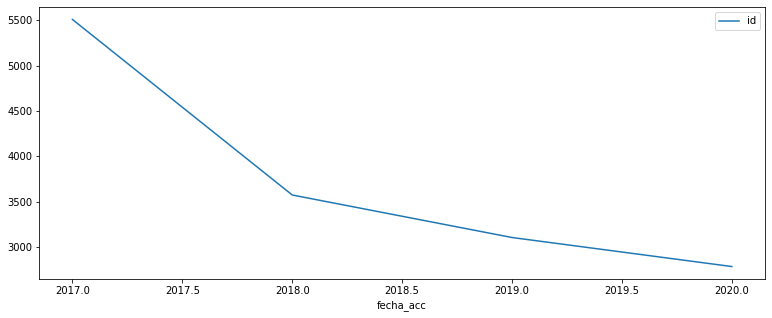

In [19]:
dataset.groupby(dataset['fecha_acc'].dt.year)['id'].count().plot(kind='line',legend='Reverse',figsize=(13,5))

**Lo bueno es que desde el 2017 la tasa de accidentalidad disminuye, veamos si pasa lo mismo con el nuemero de muertes y heridos.**

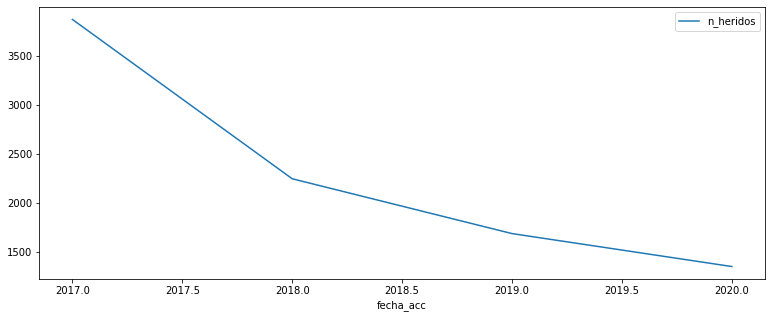

In [20]:
dataset.groupby(dataset['fecha_acc'].dt.year)['n_heridos'].sum().plot(kind='line',legend='Reverse',figsize=(13,5))

**El comportamiento de la lineas entre accidentes y heridos es muy similar, claro esta que es mas pequeña la cantidad de heridos.**

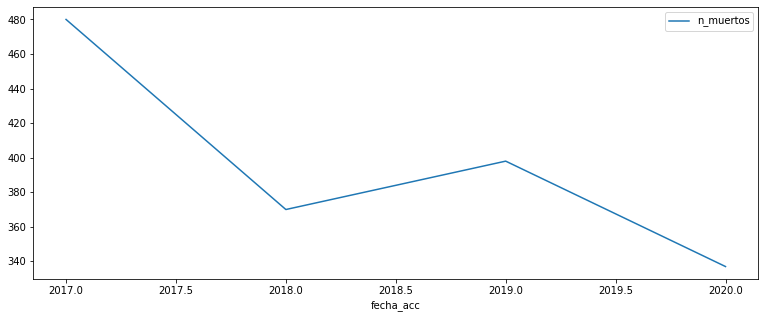

In [21]:
dataset.groupby(dataset['fecha_acc'].dt.year)['n_muertos'].sum().plot(kind='line',legend='Reverse',figsize=(13,5))

**En cambio con el numero de muertes es diferente en el 2018 bajaron los accidentes y tambien el numero de heridos, pero no el numero de muertes. los accidentes del 2018 fueron los mas letales, ya iniciando el 2019 el numero de muertes disminuye.**

In [22]:
fechas = dataset[['id']]
fechas['año'] = dataset['fecha_acc'].dt.year
fechas['mes'] = dataset['fecha_acc'].dt.month

**texto en negrita**

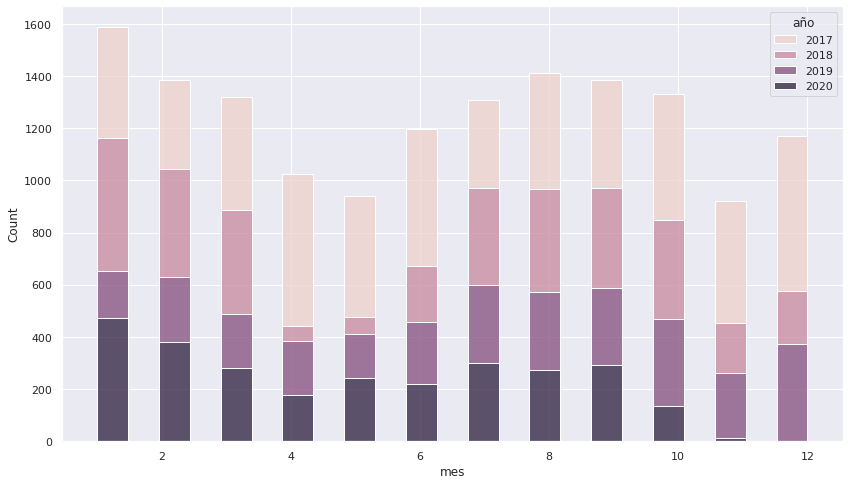

In [23]:
sns.set(rc={'figure.figsize':(14,8)})
sns.histplot(data=fechas, x='mes', hue='año', multiple='stack')

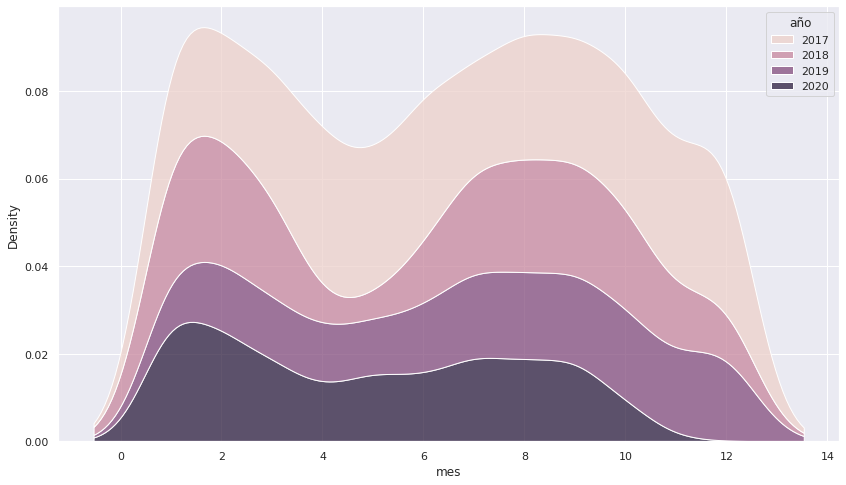

In [24]:
sns.kdeplot(data=fechas, x="mes", hue="año", multiple="stack")

**el comportamiento de accidentalidad desde el 2017 hasta el 2020 es casi que el mismo**

**En los meses con mas accidentalidad son enero y febrero, nuevamente se ven picos en julio, agosto y septiembre en estos meses las autoridades de transito deberian estar mas alertas, esto pasa en todos los años desde eñ 2017 hasta el 2020**

# Ahora exploro si pasa lo mismo durante los dias de la semana.

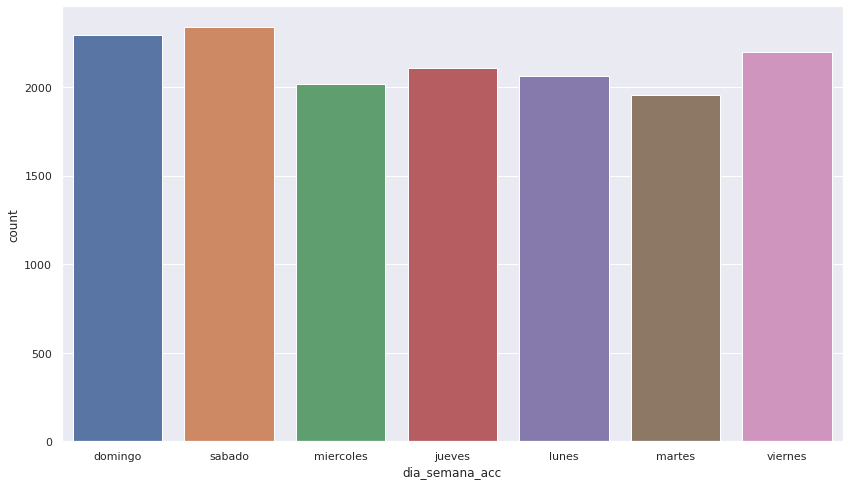

In [25]:
sns.set(rc={'figure.figsize':(14,8)})
sns.countplot(dataset['dia_semana_acc'])

In [26]:
dataset.groupby('dia_semana_acc')['dia_semana_acc'].count()

dia_semana_acc
domingo      2296
jueves       2106
lunes        2062
martes       1957
miercoles    2016
sabado       2338
viernes      2195
Name: dia_semana_acc, dtype: int64

**Definitivamente los fines de semanas es cuando hay mas accidentes de transito, pero las cantidades no son tan alejadas con respecto a los dias entre semana.**

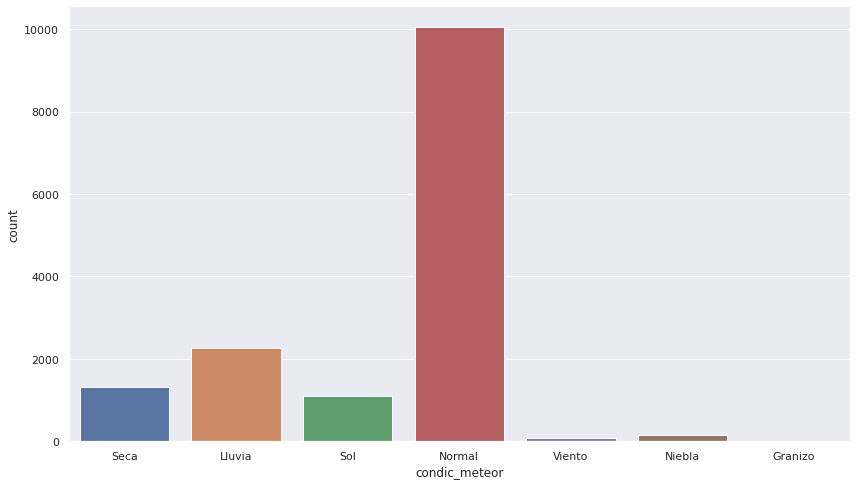

In [27]:
sns.set(rc={'figure.figsize':(14,8)})
sns.countplot(dataset['condic_meteor'])

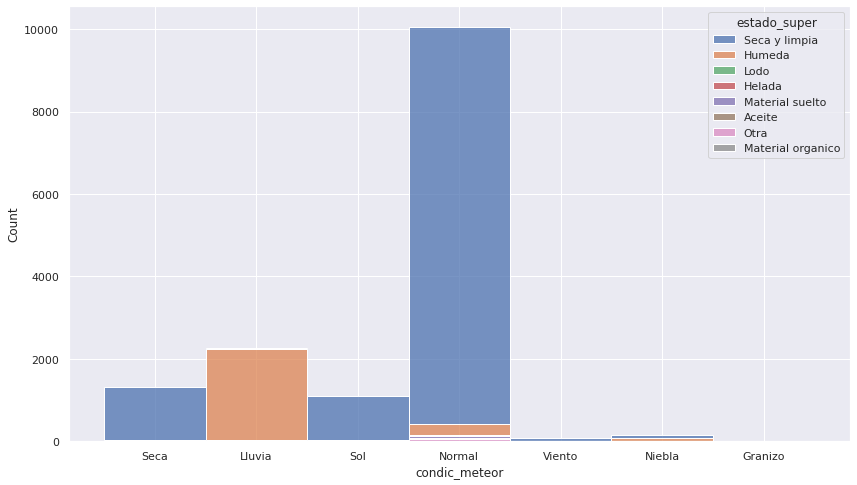

In [28]:
sns.histplot(data=dataset, x='condic_meteor', hue='estado_super', multiple='stack')

**Pense que la mayoria de accidentes de transito suedian cuando el clima no era bueno, mirando la grafica pasan es cuando el clima esta normal y la carretera esta limpia y seca. el mal clima no influye en la accidentalidad.**

In [29]:
choques = dataset[dataset['clase_accidente']=='Choque']

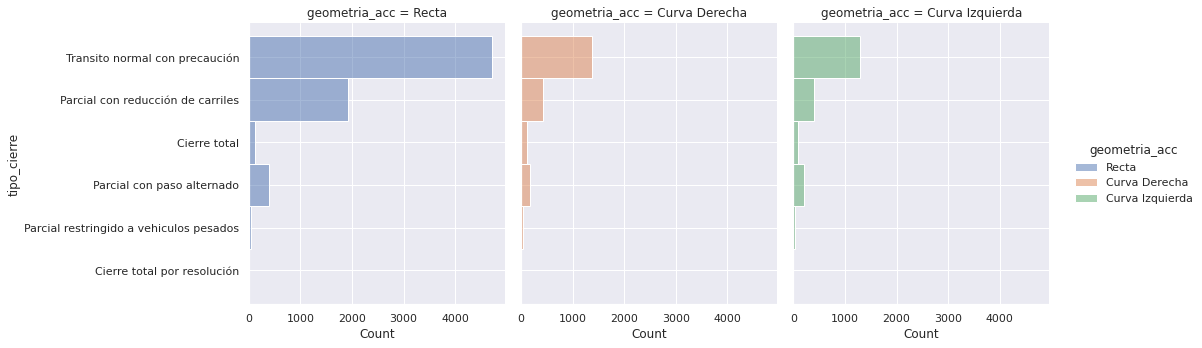

In [30]:
sns.displot(data=choques, y='tipo_cierre', hue='geometria_acc', col='geometria_acc')

**Es mas peligroso accidentarse en una linea recta y en transito normal que en las curvas y reduccion de carrieles.**

In [31]:
volcamiento = dataset[dataset['clase_accidente']=='Volcamiento']

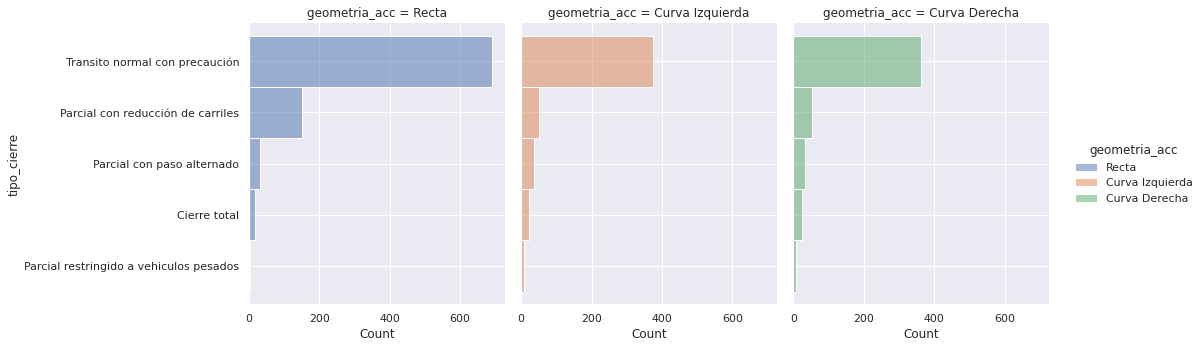

In [33]:
sns.displot(data=volcamiento, y='tipo_cierre', hue='geometria_acc', col='geometria_acc')

**De igual manera pasa con el volcamiento, pero tambien las curvas son peligrosas.**

**Definitivamente los los choques y volcamientos en un tramo recto con transito normal son los accidentes que mas cobran vidas**